In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('telcocustomerchurn_data.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [7]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## 4.2 Accuracy and dummy model

In [9]:
len (y_val)

1409

In [10]:
(y_val == churn_decision).mean()

0.8034066713981547

In [11]:
1132/1409

0.8034066713981547

In [16]:
tresholds = np.linspace (0,1,21)
scores=[]
for t in tresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print (t,score)
    scores.append(score)

0.0 0.2739531582682754
0.05 0.5088715400993612
0.1 0.5911994322214337
0.15000000000000002 0.6664300922640171
0.2 0.7097232079489
0.25 0.7388218594748048
0.30000000000000004 0.7601135557132718
0.35000000000000003 0.7721788502484032
0.4 0.7849538679914834
0.45 0.7934705464868701
0.5 0.8034066713981547
0.55 0.801277501774308
0.6000000000000001 0.794889992902768
0.65 0.7863733144073811
0.7000000000000001 0.7650816181689141
0.75 0.7444996451383961
0.8 0.7345635202271115
0.8500000000000001 0.7260468417317246
0.9 0.7260468417317246
0.9500000000000001 0.7260468417317246
1.0 0.7260468417317246


In [13]:
scores

[0.2739531582682754,
 0.5088715400993612,
 0.5911994322214337,
 0.6664300922640171,
 0.7097232079489,
 0.7388218594748048,
 0.7601135557132718,
 0.7721788502484032,
 0.7849538679914834,
 0.7934705464868701,
 0.8034066713981547,
 0.801277501774308,
 0.794889992902768,
 0.7863733144073811,
 0.7650816181689141,
 0.7444996451383961,
 0.7345635202271115,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

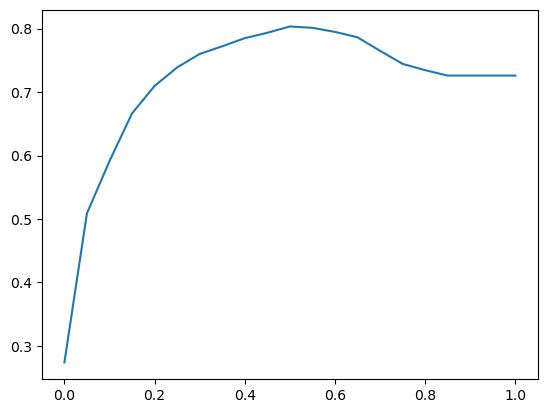

In [15]:
plt.plot(tresholds,scores)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_val, y_pred >=0.5)

0.8034066713981547

In [19]:
from collections import Counter

In [20]:
Counter(y_pred >=1.0)

Counter({False: 1409})

## 4.3 Confusion Table

In [21]:
actual_positive = (y_val==1)
actual_negative = (y_val==0)

In [22]:
t=0.5
predict_positive = (y_pred >=t)
predict_negative =(y_pred <t)

In [26]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [27]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [28]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, fp]
])

In [29]:
confusion_matrix

array([[922, 101],
       [176, 101]])

## 4.4 Precision and Recall

In [30]:
(tp+tn)/(tp+tn+fp+fn)

0.8034066713981547

In [31]:
p = tp / (tp+fp)
p

0.6752411575562701

In [32]:
r = tp / (tp+fn)
r 

0.5440414507772021

## 4.5 ROC Curves

In [33]:
tpr = tp / (tp+fn)
tpr

0.5440414507772021

In [34]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [35]:
thresholds = np.linspace(0,1,101)

scores = []

for t in thresholds:
    actual_positive = (y_val==1)
    actual_negative = (y_val==0)

    predict_positive = (y_pred >=t)
    predict_negative = (y_pred <t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [40]:
columns = ['treshold', 'tp','fp','fn','tn']
df_scores = pd.DataFrame(scores,columns=columns)

In [41]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [43]:
df_scores[::10]

,treshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,20,311,1003,0.194301,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


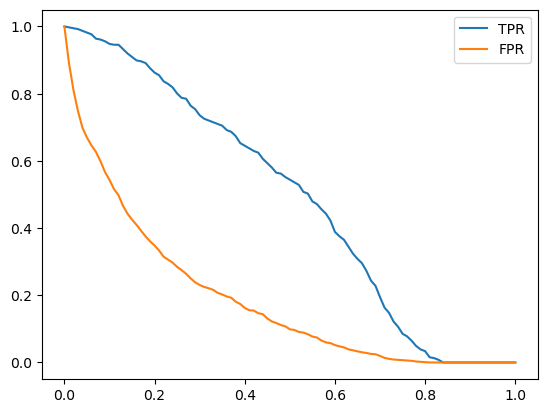

In [45]:
plt.plot(df_scores.treshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.treshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random Model

In [46]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size = len(y_val))

In [47]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [48]:
def tpr_fpr_dataframme(y_val, y_pred):
    thresholds = np.linspace(0,1,101)

    scores = []

    for t in thresholds:
        actual_positive = (y_val==1)
        actual_negative = (y_val==0)

        predict_positive = (y_pred >=t)
        predict_negative = (y_pred <t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['treshold', 'tp','fp','fn','tn']
    df_scores = pd.DataFrame(scores,columns=columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [49]:
df_rand = tpr_fpr_dataframme(y_val, y_rand)

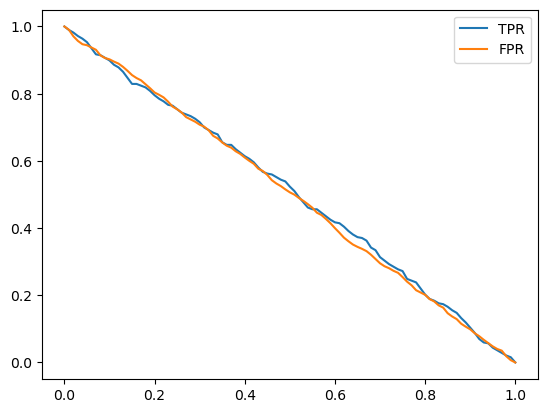

In [50]:
plt.plot(df_scores.treshold, df_rand['tpr'], label='TPR')
plt.plot(df_scores.treshold, df_rand['fpr'], label='FPR')
plt.legend()

### Ideal Model

In [51]:
num_neg = (y_val ==0).sum()
num_pos = (y_val ==1).sum()
num_neg, num_pos

(1023, 386)

In [53]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])

In [54]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [55]:
df_ideal = tpr_fpr_dataframme(y_ideal, y_ideal_pred)

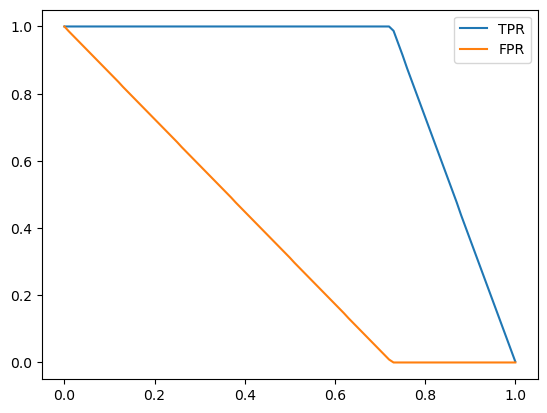

In [56]:
plt.plot(df_scores.treshold, df_ideal['tpr'], label='TPR')
plt.plot(df_scores.treshold, df_ideal['fpr'], label='FPR')
plt.legend()

### Putting Everything together

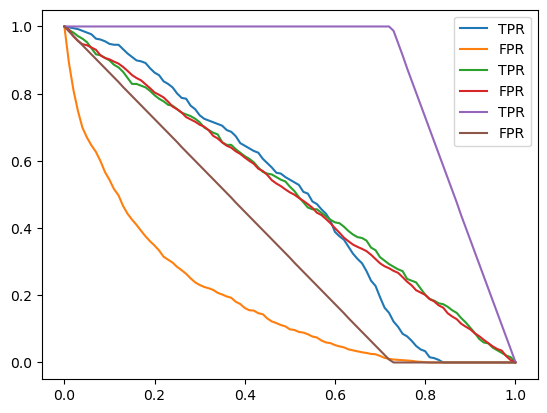

In [57]:
plt.plot(df_scores.treshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.treshold, df_scores['fpr'], label='FPR')

plt.plot(df_scores.treshold, df_rand['tpr'], label='TPR')
plt.plot(df_scores.treshold, df_rand['fpr'], label='FPR')
plt.plot(df_scores.treshold, df_ideal['tpr'], label='TPR')
plt.plot(df_scores.treshold, df_ideal['fpr'], label='FPR')

plt.legend()

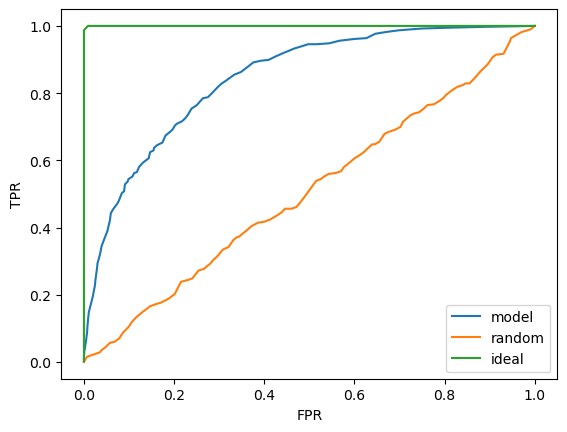

In [59]:
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [60]:
from sklearn.metrics import roc_curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


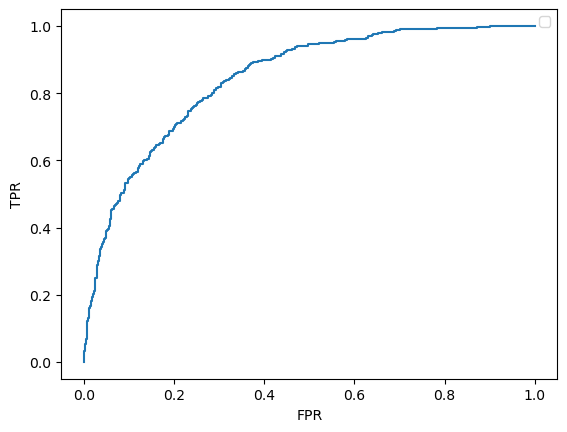

In [61]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

## 4.6 ROC AUC

In [62]:
from sklearn.metrics import auc

In [63]:
auc(fpr, tpr)

0.8438479732980819

In [64]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(y_val, y_pred)

0.8438479732980819

In [67]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [68]:
#...........

## 4.7 Cross Validation

In [96]:
def train (df, y_train,C=1.0):
    dicts = df[categorical+numerical].to_dict(orient='records')

    dv=DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [97]:
dv, model = train(df_train, y_train, C=0.001)

In [89]:
def predict(df, dv, model):
    dicts = df[categorical+numerical].to_dict(orient='records')

    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [76]:
y_pred=predict(df_val,dv,model)

In [77]:
from sklearn.model_selection import KFold

In [78]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [79]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [80]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [105]:
from tqdm.auto import tqdm

In [110]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict (df_val,dv,model)

        auc = roc_auc_score(y_val, y_pred)
        
        scores.append(auc)
    print ('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.826 +- 0.012
C=0.01 0.840 +- 0.012
C=0.1 0.841 +- 0.011
C=0.5 0.842 +- 0.011
C=1 0.840 +- 0.013
C=5 0.841 +- 0.012
C=10 0.841 +- 0.012


In [111]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1)
y_pred = predict (df_test,dv,model)

auc = roc_auc_score(y_test, y_pred)

In [112]:
auc

0.8572386167896259